In [5]:
import os
import pandas as pd
import math

# COMBINATION
comb = 'Co3'

# folder path
dir_path  = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


GLOBAL RECALL 

ES POBLACIONAL - NO SE NECESITA PROMEDIAR LA POBLACION

In [6]:
df_ave_data = pd.DataFrame(columns=['topic', '1','2','3', '4', '5'])

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
        
    # inserto nro de topico
    row = [t]

    for f in sorted(files):
        if "_EVALUATION__globalRecall.txt" in f:
                        
            run = f.split('_')[1] # nro de run
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
                                            
            mean = df_metric.mean(numeric_only=True, axis=0)

            # mean es un df, asi que acceder a columna 0
            row.append(mean[0])            
    
    
    # df con promedio de la ultima poblacion de Global Recall de cada corrida para cada topico
    # en realidad como es poblacional es 1 solo valor por corrida
    #    topic     1      2       3           4      5        
    #     1       0.893939  0.904040  0.888889  0.888889  0.929293
    #     134     0.966006  0.943343  0.951841  0.971671  0.977337
    df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)



# set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'co3_globalRecall_evaluation_by_run_last_gen.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.893939,0.966006,0.893878,0.846154,0.851013,0.9625,0.871795,0.882353,0.896552,0.842640,...,0.687500,0.878261,0.871345,0.793478,0.796703,0.736196,0.805825,0.703281,0.854342,0.680000
2,0.904040,0.943343,0.926531,0.807692,0.830751,0.9625,0.846154,0.831933,0.931034,0.812183,...,0.750000,0.869565,0.842105,0.793478,0.818681,0.773006,0.844660,0.392297,0.784314,0.733333
3,0.888889,0.951841,0.897959,0.846154,0.810489,0.9500,0.871795,0.848739,0.896552,0.817259,...,0.708333,0.860870,0.853801,0.760870,0.787546,0.803681,0.844660,0.637660,0.823529,0.706667
4,0.888889,0.971671,0.881633,0.673077,0.874851,0.9375,0.871795,0.907563,0.913793,0.812183,...,0.833333,0.878261,0.888889,0.782609,0.772894,0.809816,0.825243,0.703281,0.775910,0.640000
5,0.929293,0.977337,0.889796,0.769231,0.825983,0.9375,0.786325,0.865546,0.931034,0.786802,...,0.687500,0.817391,0.847953,0.804348,0.816850,0.601227,0.834951,0.626248,0.829132,0.760000


In [7]:
stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.901010,0.962040,0.897959,0.788462,0.838617,0.9500,0.849573,0.867227,0.913793,0.814213,...,0.733333,0.860870,0.860819,0.786957,0.798535,0.744785,0.831068,0.612553,0.813445,0.704000
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.016978,0.014108,0.017075,0.071955,0.024896,0.0125,0.037059,0.029352,0.017241,0.019855,...,0.061450,0.025352,0.019129,0.016485,0.019512,0.085406,0.016246,0.128252,0.032702,0.046571


In [8]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.901010,5.0,0.016978
134,0.962040,5.0,0.014108
187,0.897959,5.0,0.017075
215,0.788462,5.0,0.071955
221,0.838617,5.0,0.024896
25,0.950000,5.0,0.012500
259,0.849573,5.0,0.037059
289,0.867227,5.0,0.029352
350,0.913793,5.0,0.017241
363,0.814213,5.0,0.019855


In [9]:

print(stats_all_topics['mean'].describe().transpose())


t = pd.DataFrame({  'mean_gr': [stats_all_topics['mean'].mean()],                    
                    'count_gr': [stats_all_topics['mean'].count()],
                    'std_gr': [stats_all_topics['mean'].std()]})

print(t)

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_gr'] = ci95_lo
t['ci95_hi_gr'] = ci95_hi


t.to_csv(save_path + 'co3_globalRecall_evaluation_stats_last_gen.csv')
t

count    25.000000
mean      0.823000
std       0.085378
min       0.612553
25%       0.786957
50%       0.831068
75%       0.867227
max       0.962040
Name: mean, dtype: float64
   mean_gr  count_gr    std_gr
0    0.823        25  0.085378


,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0.823,25,0.085378,0.789532,0.856468


Text(0.5, 0.98, 'Global Recall  - Co3')

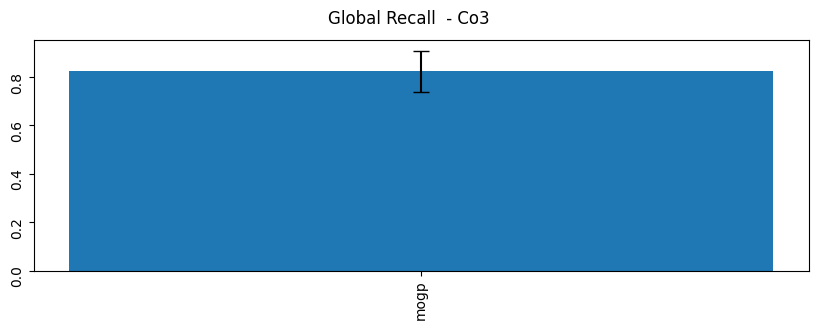

In [10]:
######### global ReCALL
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_gr'], yerr=t['std_gr'], capsize=6)

fig.suptitle('Global Recall  - '+ comb)